## Calculating the chi-square for a distribution and a histogram.

We will do it two ways. With and without normalized histograms

In [1]:
%pylab inline --no-import-all
from scipy.stats import norm #will use this for plotting

Populating the interactive namespace from numpy and matplotlib


### make some data from a N(0,1) distribution

In [2]:
n_bins = 50
x = norm.rvs(size=10000)

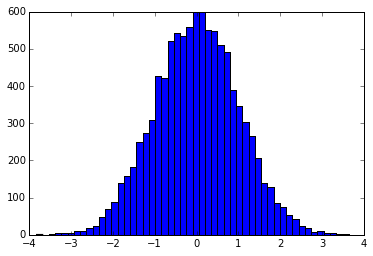

In [3]:
counts, bins, patches = plt.hist(x, bins=n_bins,normed=False)

## Get Bin centers

Get the location for the bin centers. Here I do it step by step so you can see what is going on.

In [4]:
# all bins edges
bins

array([-3.82385845, -3.67475645, -3.52565445, -3.37655245, -3.22745045,
       -3.07834845, -2.92924645, -2.78014445, -2.63104245, -2.48194045,
       -2.33283845, -2.18373645, -2.03463445, -1.88553245, -1.73643045,
       -1.58732845, -1.43822645, -1.28912445, -1.14002245, -0.99092045,
       -0.84181845, -0.69271645, -0.54361445, -0.39451245, -0.24541045,
       -0.09630845,  0.05279355,  0.20189555,  0.35099755,  0.50009955,
        0.64920155,  0.79830355,  0.94740555,  1.09650755,  1.24560955,
        1.39471155,  1.54381355,  1.69291555,  1.84201755,  1.99111955,
        2.14022155,  2.28932355,  2.43842555,  2.58752755,  2.73662955,
        2.88573155,  3.03483355,  3.18393555,  3.33303755,  3.48213955,
        3.63124155])

In [5]:
right_edges = bins[1:]
right_edges

array([-3.67475645, -3.52565445, -3.37655245, -3.22745045, -3.07834845,
       -2.92924645, -2.78014445, -2.63104245, -2.48194045, -2.33283845,
       -2.18373645, -2.03463445, -1.88553245, -1.73643045, -1.58732845,
       -1.43822645, -1.28912445, -1.14002245, -0.99092045, -0.84181845,
       -0.69271645, -0.54361445, -0.39451245, -0.24541045, -0.09630845,
        0.05279355,  0.20189555,  0.35099755,  0.50009955,  0.64920155,
        0.79830355,  0.94740555,  1.09650755,  1.24560955,  1.39471155,
        1.54381355,  1.69291555,  1.84201755,  1.99111955,  2.14022155,
        2.28932355,  2.43842555,  2.58752755,  2.73662955,  2.88573155,
        3.03483355,  3.18393555,  3.33303755,  3.48213955,  3.63124155])

In [6]:
left_edges = bins[:-1]
left_edges

array([-3.82385845, -3.67475645, -3.52565445, -3.37655245, -3.22745045,
       -3.07834845, -2.92924645, -2.78014445, -2.63104245, -2.48194045,
       -2.33283845, -2.18373645, -2.03463445, -1.88553245, -1.73643045,
       -1.58732845, -1.43822645, -1.28912445, -1.14002245, -0.99092045,
       -0.84181845, -0.69271645, -0.54361445, -0.39451245, -0.24541045,
       -0.09630845,  0.05279355,  0.20189555,  0.35099755,  0.50009955,
        0.64920155,  0.79830355,  0.94740555,  1.09650755,  1.24560955,
        1.39471155,  1.54381355,  1.69291555,  1.84201755,  1.99111955,
        2.14022155,  2.28932355,  2.43842555,  2.58752755,  2.73662955,
        2.88573155,  3.03483355,  3.18393555,  3.33303755,  3.48213955])

In [7]:
bin_centers = (right_edges+left_edges)/2
bin_centers

array([-3.74930745, -3.60020545, -3.45110345, -3.30200145, -3.15289945,
       -3.00379745, -2.85469545, -2.70559345, -2.55649145, -2.40738945,
       -2.25828745, -2.10918545, -1.96008345, -1.81098145, -1.66187945,
       -1.51277745, -1.36367545, -1.21457345, -1.06547145, -0.91636945,
       -0.76726745, -0.61816545, -0.46906345, -0.31996145, -0.17085945,
       -0.02175745,  0.12734455,  0.27644655,  0.42554855,  0.57465055,
        0.72375255,  0.87285455,  1.02195655,  1.17105855,  1.32016055,
        1.46926255,  1.61836455,  1.76746655,  1.91656855,  2.06567055,
        2.21477255,  2.36387455,  2.51297655,  2.66207855,  2.81118055,
        2.96028255,  3.10938455,  3.25848655,  3.40758855,  3.55669055])

In [8]:
bin_width = bins[1]-bins[0]

## Raw histogram counts

To go from the pdf to the expected counts in a bin, you need to include a normalization constant.

In [9]:
normalization = x.size*(bins[1]-bins[0])

In [10]:
prediction = normalization*norm.pdf(bin_centers)

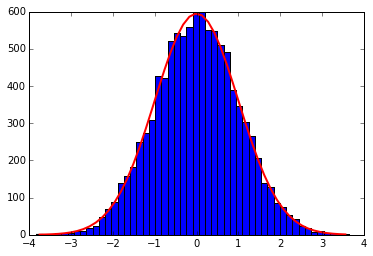

In [11]:
counts, bins, patches = plt.hist(x, bins=n_bins,normed=False)
plt.plot(bin_centers,prediction, c='r', lw=2)

In [12]:
np.sum(prediction), np.sum(counts)

(9997.9604319589253, 10000.0)

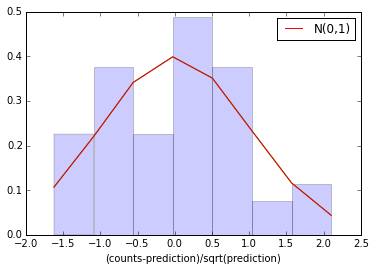

In [13]:
# make a quick plot of (counts-prediction)/sqrt(prediction)
# it should look like N(0,1) for chi-square formula to be appropriate
temp = plt.hist((counts-prediction)/np.sqrt(prediction), bins=7, normed=True, alpha=0.2)
plt.plot(temp[1], norm.pdf(temp[1]))
plt.plot(temp[1], norm.pdf(temp[1]), label='N(0,1)')
plt.legend()
plt.xlabel('(counts-prediction)/sqrt(prediction)')

## Chisquare

In [14]:
from scipy.stats import chisquare

In [15]:
from scipy.stats import chi2

In [16]:
# right way
np.sum((counts-prediction)**2/prediction)

40.684670199159804

In [17]:
# right way
chisq_obs, pvalue = chisquare(counts, prediction)
chisq_obs, pvalue

(40.684670199159804, 0.79514983721038024)

Now we can calculate the p-value for having a chi-square value this large.
Importantly we need to have the number of degrees of freedom be the number of bins.

In [18]:
#p-value
chi2.sf(chisq_obs,counts.size)

0.82350246016717565

## Note 
A p-value of 0 or 1 is very unlikely. You should expect to sit in the middle of the distribution and have a p-value of ~0.5

## Normalized Histogram (wrong way)

Here we make a normed histogram, which is equivalent to dividing by the normalization constant

In [19]:
prediction_normed = norm.pdf(bin_centers)

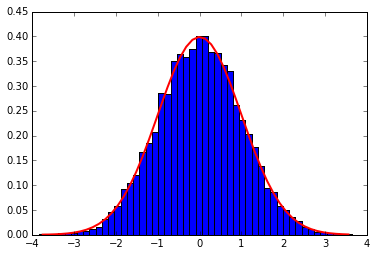

In [20]:
counts_normed, bins, patches = plt.hist(x, bins=n_bins,normed=True)
plt.plot(bin_centers,prediction_normed, c='r', lw=2)

In [21]:
# Note, they don't add up to 1., they add up to (roughly) 1/bin_width
np.sum(prediction_normed), np.sum(counts_normed)

(6.7054502553019422, 6.7068181564988683)

In [22]:
1/bin_width

6.7068181564988727

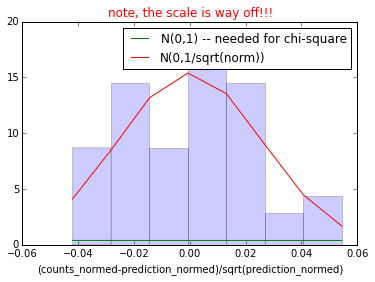

In [23]:
# make a quick plot of (counts-prediction)/sqrt(prediction)
# it should look like N(0,1) for chi-square formula to be appropriate
temp = plt.hist((counts_normed-prediction_normed)/np.sqrt(prediction_normed), bins=7, normed=True, alpha=0.2)
plt.plot(temp[1], norm.pdf(temp[1]), label='N(0,1) -- needed for chi-square')
plt.plot(temp[1], norm.pdf(temp[1], 0,1./np.sqrt(normalization)), label='N(0,1/sqrt(norm))')
plt.legend()
plt.xlabel('(counts_normed-prediction_normed)/sqrt(prediction_normed)')
plt.title('note, the scale is way off!!!', color='r')

In [24]:
#wrong way
np.sum((counts_normed-prediction_normed)**2/prediction_normed)

0.027286468478289808

In [25]:
#wrong way
chisq_obs_wrong, pvalue_wrong = chisquare(counts_normed, prediction_normed)
chisq_obs_wrong, pvalue_wrong

(0.027286468478289808, 1.0)

In [26]:
## compare with the right way
chisq_obs, pvalue

(40.684670199159804, 0.79514983721038024)

In [27]:
#p-value
chi2.sf(chisq_obs_wrong,counts.size)

1.0

## Note 
A p-value of 0 or 1 is very unlikely. You should expect to sit in the middle of the distribution and have a p-value of ~0.5